In [51]:
# Import and wrangle data

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # Since we are completing a 
# regression (RandomForestRegressor) we should use OHE
# if go back later and do a linear regression or Ridge regression, should also use a Standard Scaler

In [16]:
X_train = pd.read_csv('data/dengue_features_train.csv')
y_train = pd.read_csv('data/dengue_labels_train.csv')['total_cases']
X_test = pd.read_csv('data/dengue_features_test.csv')

In [17]:
def wrangleFeatures(df):
    # Make of the copy of the df, keep the original in local memory
    df = df.copy()
    
    # Convert 'week_start_date' to datetime object and set as index
    df['week_start_date'] = pd.to_datetime(df['week_start_date'], infer_datetime_format=True)
    df.set_index(keys='week_start_date', inplace=True)
    
    return df

In [18]:
X_train = wrangleFeatures(X_train)
X_test = wrangleFeatures(X_test)

In [19]:
print(X_train.shape, X_test.shape)
display(X_train.head())
X_test.head()

(1456, 23) (416, 23)


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
2008-04-29,sj,2008,18,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
2008-05-06,sj,2008,19,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2008-05-13,sj,2008,20,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
2008-05-20,sj,2008,21,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
2008-05-27,sj,2008,22,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [20]:
print(X_train.shape, y_train.shape)
display(y_train.head())
display(X_train.head())
X_test.head()

(1456, 23) (1456,)


0    4
1    5
2    4
3    3
4    6
Name: total_cases, dtype: int64

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
2008-04-29,sj,2008,18,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
2008-05-06,sj,2008,19,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2008-05-13,sj,2008,20,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
2008-05-20,sj,2008,21,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
2008-05-27,sj,2008,22,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456 entries, 1990-04-30 to 2010-06-25
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   ndvi_ne                                1262 non-null   float64
 4   ndvi_nw                                1404 non-null   float64
 5   ndvi_se                                1434 non-null   float64
 6   ndvi_sw                                1434 non-null   float64
 7   precipitation_amt_mm                   1443 non-null   float64
 8   reanalysis_air_temp_k                  1446 non-null   float64
 9   reanalysis_avg_temp_k                  1446 non-null   float64
 10  reanalysis_dew_point_temp_k            1446 non-null  

In [22]:
X_train.isna().sum() # Possibly need an imputer 

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

In [23]:
X_train.nunique()

city                                        2
year                                       21
weekofyear                                 53
ndvi_ne                                  1214
ndvi_nw                                  1365
ndvi_se                                  1395
ndvi_sw                                  1388
precipitation_amt_mm                     1157
reanalysis_air_temp_k                    1176
reanalysis_avg_temp_k                     600
reanalysis_dew_point_temp_k              1180
reanalysis_max_air_temp_k                 141
reanalysis_min_air_temp_k                 117
reanalysis_precip_amt_kg_per_m2          1039
reanalysis_relative_humidity_percent     1370
reanalysis_sat_precip_amt_mm             1157
reanalysis_specific_humidity_g_per_kg    1171
reanalysis_tdtr_k                         519
station_avg_temp_c                        492
station_diur_temp_rng_c                   470
station_max_temp_c                         73
station_min_temp_c                

In [24]:
X_train['city'].unique()

array(['sj', 'iq'], dtype=object)

In [25]:
y_train.head()

0    4
1    5
2    4
3    3
4    6
Name: total_cases, dtype: int64

In [26]:
# Split the data is step 2, but it is already split

In [27]:
# Baseline MAE (Mean Absolute Error), this is a regression problem 

print('Target mean: {:.04f}'.format(y_train.mean())) 
y_pred = [y_train.mean()] * len(y_train)
MAE = mean_absolute_error(y_train, y_pred)
print('MAE if always picked the mean as our prediction: {:.4f}'.format(MAE))

# SO, if you always guessed 24.6751, you would be, on average, off by 23.0034

Target mean: 24.6751
MAE if always picked the mean as our prediction: 23.0034


In [32]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(random_state=42)
)

In [33]:
model.fit(X_train, y_train)

/Users/frankhowd/.local/share/virtualenvs/DS23-dengai-FH-5MRVlSB_/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['city'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [36]:
# Check Metrics

print('Training MAE: {:.4f}'.format(mean_absolute_error(y_train, model.predict(X_train))))

Training MAE: 4.5322


In [49]:
# Communicate Results

importances = model.named_steps['randomforestregressor'].feature_importances_
features = model.named_steps['onehotencoder'].get_feature_names()

<class 'category_encoders.one_hot.OneHotEncoder'>


In [39]:
importances

array([7.22961940e-05, 5.77417625e-05, 2.22217174e-01, 1.64296250e-01,
       2.10018878e-02, 8.04368276e-02, 3.73834878e-02, 8.37889710e-02,
       1.18892980e-02, 5.94655312e-02, 1.50199878e-02, 3.24129942e-02,
       1.79057067e-02, 1.74610710e-02, 3.50579501e-02, 1.86276478e-02,
       1.42641527e-02, 2.80041466e-02, 2.08457985e-02, 1.75509901e-02,
       1.76881084e-02, 4.82356251e-02, 7.88328061e-03, 2.84330754e-02])

In [46]:
features

['city_sj',
 'city_iq',
 'year',
 'weekofyear',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

<AxesSubplot:>

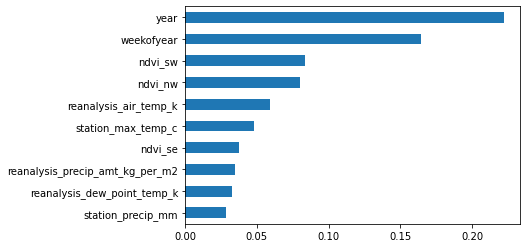

In [53]:
pd.Series(importances, index=features).sort_values().tail(10).plot(kind='barh')

In [54]:
y_pred = model.predict(X_test)

In [77]:
submission = X_test[['city', 'year', 'weekofyear']]
submission['total_cases'] = y_pred

<ipython-input-77-3cadfb704fe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['total_cases'] = y_pred


In [78]:
type(submission)

pandas.core.frame.DataFrame

In [79]:
submission.reset_index(drop=True, inplace=True)

In [80]:
submission # 'total_cases' format needs to be an int

,city,year,weekofyear,total_cases
0,sj,2008,18,4.81
1,sj,2008,19,5.04
2,sj,2008,20,5.41
3,sj,2008,21,8.30
4,sj,2008,22,9.00
...,...,...,...,...
411,iq,2013,22,3.84
412,iq,2013,23,3.32
413,iq,2013,24,2.18
414,iq,2013,25,3.21


In [84]:
y_pred[:5]

array([4.81, 5.04, 5.41, 8.3 , 9.  ])

In [88]:
y_pred.astype(int) #An array; the float values are dropped, not rounded.  These things need to be given consideration. 

array([ 4,  5,  5,  8,  9, 10, 11, 15, 23, 18, 18, 21, 28, 28, 49, 54, 40,
       59, 70, 74, 62, 37, 28, 44, 34, 29, 22, 33, 29, 27, 22, 22, 13, 14,
       20, 13, 13, 13, 11, 10,  9, 10,  9, 11,  5,  6,  6,  3,  5,  2,  5,
        5,  5,  4,  6,  4, 10,  7,  9, 14, 13, 24, 38, 31, 33, 43, 52, 57,
       59, 61, 69, 38, 72, 60, 69, 66, 73, 67, 44, 25, 25, 30, 32, 21, 18,
       18, 24,  6, 13, 12, 14, 13, 10, 16, 12, 12, 10,  8,  6, 11, 10,  7,
        5,  6, 13, 15,  9, 13, 13, 32, 43, 38, 23, 26, 44, 44, 34, 26, 47,
       66, 66, 66, 99, 77, 74, 78, 66, 59, 95, 66, 56, 31, 32, 24, 21, 19,
       26, 16, 16, 20, 14, 10, 14, 15, 13, 10, 12,  9,  8,  5,  6,  5,  5,
        6,  6,  3,  5,  8,  5,  5,  8, 15, 15, 19, 38, 38, 20, 23, 26, 34,
       26, 45, 57, 50, 60, 59, 61, 30, 39, 67, 56, 29, 20, 36, 26, 24, 26,
       25, 19, 28, 18, 18, 15, 12, 14, 11, 11, 10, 10, 14,  9,  4,  5,  5,
        5,  4,  5,  4,  5,  8,  5, 11,  8,  8, 13, 22, 38, 32, 24, 20, 24,
       27, 37, 28, 61, 54

In [90]:
submission.to_csv('submissions/2020-01-24_submission.csv', index=False)